## Observations and Insights

* Capomulin and Ramicane produced the lowest tumor volume (at max timepoints) out of the four drugs sampled for the box and whisker plot analysis. They had IQRs fully below the ranges of Ifubanol and Ceftamin.
* Furthermore, in the summary statistics table, we can see that Capomulin and Ramicane overall averaged lower tumor volume compared to every other drug regimen and they had somewhat lower standard deviation as well. This leads in the direction of those drugs potentially being more successful at treating the tumors and for having more consistent results on average.
* The outlier from the final tumor volume analysis of Infubinol is rather far off from the bounds of the data set, but it could potentially have been miscategorized from either Capomulin or Ramicane, whose median values are about the same as the outlier's. 

In [485]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_mouse = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
study_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [429]:
# find the current number of mice in the data set
study_mouse["Mouse ID"].nunique()

249

In [430]:
# search for mouse IDs with duplicate time points
if_rows_dup = study_mouse.duplicated(subset=["Mouse ID", "Timepoint"])
dup_list = study_mouse.loc[if_rows_dup, "Mouse ID"]
print(dup_list)

# We can see from the 'dup_list' that there is only one ID with duplicates: g989

# pull the mouse ID to be dropped from the data set
mouse_to_drop = dup_list.unique()[0]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [431]:
# preview all the data for the duplicate mouse ID (to be dropped)
study_mouse[study_mouse["Mouse ID"] == mouse_to_drop]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [432]:
# drop the duplicate mouse ID from the dataframe
clean_sm = study_mouse[study_mouse["Mouse ID"] != mouse_to_drop]
clean_sm = clean_sm.reset_index()
clean_sm

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [433]:
# check the number of mice in the clean dataframe
clean_sm["Mouse ID"].nunique()

248

## Summary Statistics

In [434]:
# generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = clean_sm.groupby("Drug Regimen")

# create multiple series then combine them into one data frame
drug_mean = drug_group["Tumor Volume (mm3)"].mean()
drug_median = drug_group["Tumor Volume (mm3)"].median()
drug_variance = drug_group["Tumor Volume (mm3)"].var()
drug_stdev = drug_group["Tumor Volume (mm3)"].std()
drug_sem = drug_group["Tumor Volume (mm3)"].sem()

drug_stats1 = pd.DataFrame({"Mean": drug_mean, 
                            "Median": drug_median, 
                            "Variance": drug_variance, 
                            "Std. Dev.": drug_stdev, 
                            "SEM": drug_sem})
drug_stats1

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [435]:
# create the data frame in a single groupby statement using .agg
drug_stats2 = clean_sm.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
drug_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

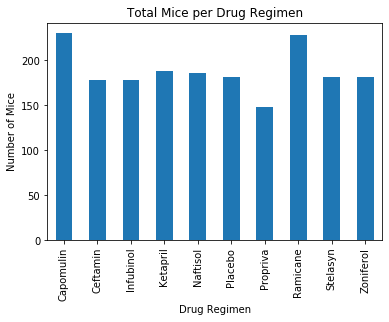

In [436]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_totals_per_drug = drug_group["Mouse ID"].count()
mouse_totals_per_drug.plot(kind="bar")
plt.title("Total Mice per Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

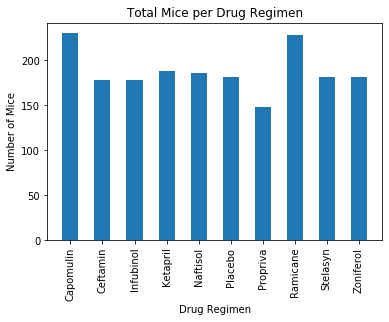

In [437]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = drug_group.groups.keys()
y_axis = drug_group["Mouse ID"].count()
plt.bar(x_axis, y_axis, width=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

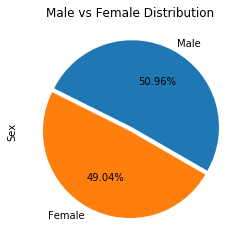

In [483]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dist_sex = clean_sm["Sex"].value_counts()
explode = (0.05, 0)

dist_sex.plot(kind="pie", explode=explode, autopct="%1.2f%%", startangle=-30)
plt.title("Male vs Female Distribution")

plt.show()

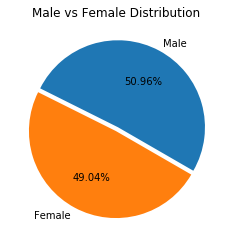

In [439]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = mouse_sex
labels = clean_sm["Sex"].unique()

plt.pie(sizes, labels=labels, explode=explode, autopct="%1.2f%%", startangle=-30)
plt.title("Male vs Female Distribution")

plt.show()

## Quartiles, Outliers, and Boxplots

In [464]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
list_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
list_drugs_data = clean_sm[clean_sm["Drug Regimen"].isin(list_drugs)]

# Start by getting the last (greatest) timepoint for each mouse
each_mouse_timepoints = list_drugs_data.groupby(["Mouse ID"])
max_mouse_timepoint = each_mouse_timepoints["Timepoint"].max()    

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
list_drugs_max_timepoint = pd.merge(list_drugs_data, max_mouse_timepoint, on=["Mouse ID", "Timepoint"], how="right")
list_drugs_max_timepoint

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
95,1797,x822,Ceftamin,Male,3,29,45,61.386660,3
96,1813,y163,Infubinol,Female,17,27,45,67.685569,3
97,1845,y769,Ceftamin,Female,6,27,45,68.594745,4
98,1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [449]:
# Put treatments into a list for for loop (and later for plot labels)
print(f"Drug list: {list_drugs}")
print()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in list_drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_ldmt = list_drugs_max_timepoint.loc[list_drugs_max_timepoint["Drug Regimen"] == drug]
    
    # add subset 
    tumor_vol_data.append(drug_ldmt["Tumor Volume (mm3)"])
    
    # Determine quartiles, iqr, and bounds
    quartiles = drug_ldmt["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # print the values for iqr and bounds
    print(f"The IQR for {drug} is {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # determine outliers using upper and lower bound
    for x in drug_ldmt["Tumor Volume (mm3)"]:
        if x < lower_bound or x > upper_bound:
            print(f"{x} is an outlier for {drug}.")
    print()

Drug list: ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

The IQR for Capomulin is 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

The IQR for Ramicane is 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

The IQR for Infubinol is 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
36.321345799999996 is an outlier for Infubinol.

The IQR for Ceftamin is 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.



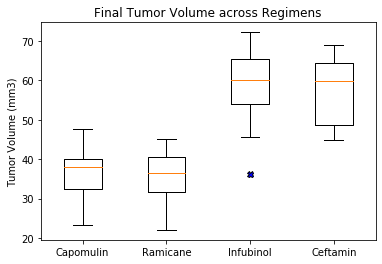

In [442]:
# format for outliers
blue_x = dict(markerfacecolor='b', marker='X')

# set up the box plot
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, flierprops=blue_x)

# relevant labels
ax1.set_title("Final Tumor Volume across Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(list_drugs)

plt.show()

## Line and Scatter Plots

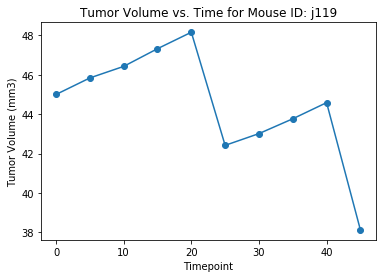

In [454]:
# generate a line plot of time versus tumor volume for a mouse treated with Capomulin

# find all mice treated with Capomulin, then select one at random, and store its data
capomulin_mice = clean_sm.loc[clean_sm["Drug Regimen"] == "Capomulin"]
ID_cap_mice = capomulin_mice["Mouse ID"].unique()
line_plot_mouse = np.random.choice(ID_cap_mice, 1)
line_plot_mouse_data = capomulin_mice.loc[capomulin_mice["Mouse ID"] == line_plot_mouse[0]]

# generate the line plot
plt.title("Tumor Volume vs. Time for Mouse ID: " + str(line_plot_mouse[0]))
x_axis = line_plot_mouse_data["Timepoint"]
plt.xlabel("Timepoint")
y_axis = line_plot_mouse_data["Tumor Volume (mm3)"]
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis, marker="o")

plt.show()

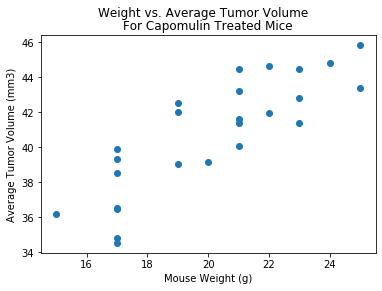

In [491]:
# generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen

# group all the Capomulin mice data by ID and then calculate the data
cap_mice_group = capomulin_mice.groupby(["Mouse ID"])
weight_cmg = cap_mice_group["Weight (g)"].mean()
average_tumor_vol_cmg = cap_mice_group["Tumor Volume (mm3)"].mean()

# generate the scatter plot
plt.scatter(x=weight_cmg, y=average_tumor_vol_cmg)
plt.suptitle("Weight vs. Average Tumor Volume")
plt.title("For Capomulin Treated Mice")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

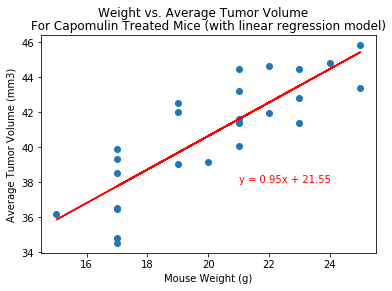

In [500]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_cmg
y_values = average_tumor_vol_cmg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.suptitle("Weight vs. Average Tumor Volume")
plt.title("For Capomulin Treated Mice (with linear regression model)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, (21,38), fontsize=10, color="red")

plt.show()